# Machine Learning les 1 - Classificatie

Notebook bij les 1 van de leerlijn machine learning van S3 - AI. 

© Auteur: Rianne van Os

**Voor deze les is geen voorbereiding nodig.**

In de machine learning leerlijn gaan we je de belangrijkste technieken leren om een voorspellend model te maken. Als je binnen de CRISP-DM cyclus de Business Understanding en Data Understanding gedaan hebt, kun je gaan nadenken over wel algoritme geschikt is om je probleem op te lossen. In deze lessenserie leer je verschillende machine learning modellen kennen, we leren je hoe je ze kunt toepassen, wat voor data preparatie stappen nodig zijn om je model te verbeteren en hoe je kunt evalueren of je model goed werkt.

We starten met wat oefeningen om te ontdekken wat een machine learning model precies is.

In les 3 van de data-lijn hebben we al gekeken naar de dataset van pinguinsoorten in de Palmer Archipel op Antarctica. Daar hebben we verschillende visualisaties gemaakt van de verschillende features. Nu gaan we deze dataset gebruiken om jullie eerste machine learning model te maken. 

### Data zonder label

Bij het verzamelen van de data over de pinguins was ook een stagiair-onderzoeker meegereisd naar de Palmer Archipel. Deze stagiair heeft een hoop pinguins opgemeten, maar hij bleek niet in staat om de bijbehorende soort te bepalen. De data van de stagiair kun je vinden in `pinguins_metingen_stagiair.csv`. 

In [72]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ML Opdracht 1.1
a. Lees het bestand `pinguins_metingen_stagiair.csv' in en bekijk de metingen die de stagiair heeft gedaan.

b. Maak gebruik van de dataset `pinguins.csv` om te proberen te achterhalen welke soort bij de metingen hoort. Bekijk hiervoor de beschikbare data goed. Welke features kunnen je helpen om de soort te bepalen? Kun je visualisaties maken die je hierbij helpen? Probeer je vermoeden goed te onderbouwen met behulp van cijfers of visualisaties.



In [73]:
df = pd.read_csv('../databronnen/pinguins.csv')

In [74]:
# Kijken naar het eiland levert interessante info op: bepaalde species komen niet voor op bepaalde eilanden
df.groupby(['island', 'species'])['species'].agg('count')

island     species  
Biscoe     Adelie        44
           Gentoo       122
Dream      Adelie        55
           Chinstrap     67
Torgersen  Adelie        51
Name: species, dtype: int64

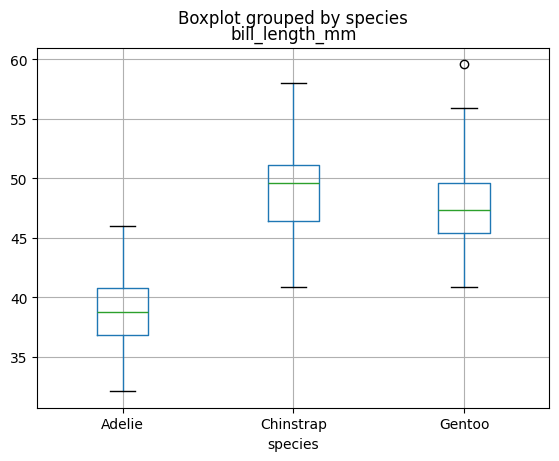

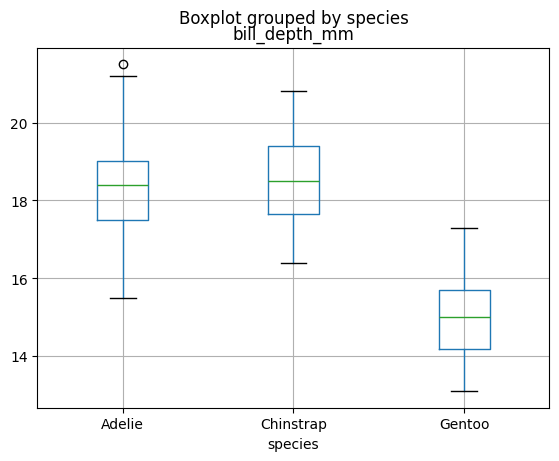

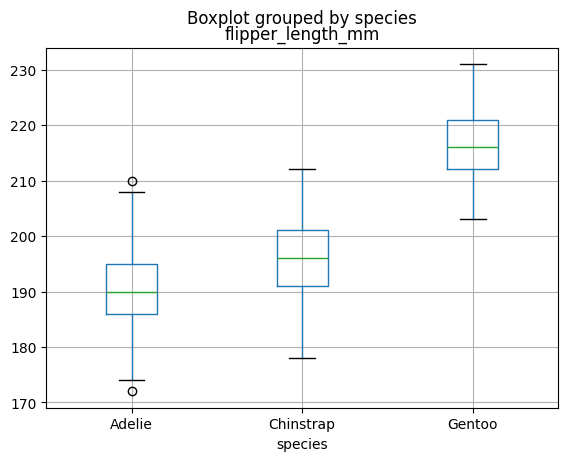

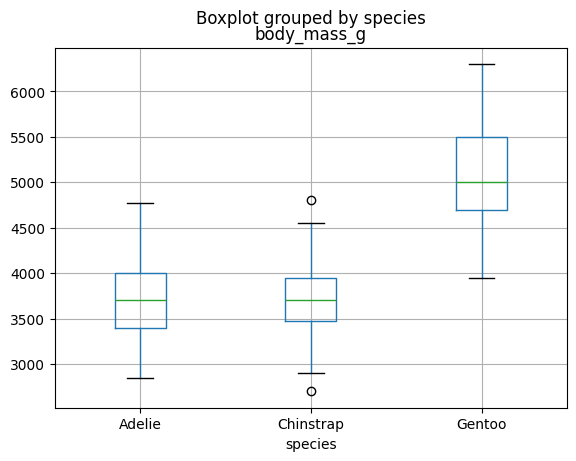

In [75]:
# Boxplots zijn interessant om verschillen tussen species voor de kwantitatieve features te bepalen
# Wanneer bill_length_mm bijv. kleiner is dan 41, is het een Adelie
columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in columns:
    df.boxplot([col], by = 'species')

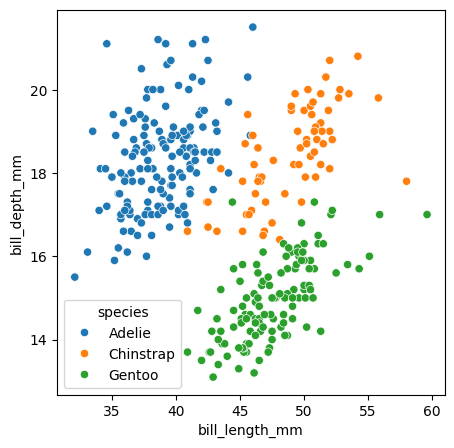

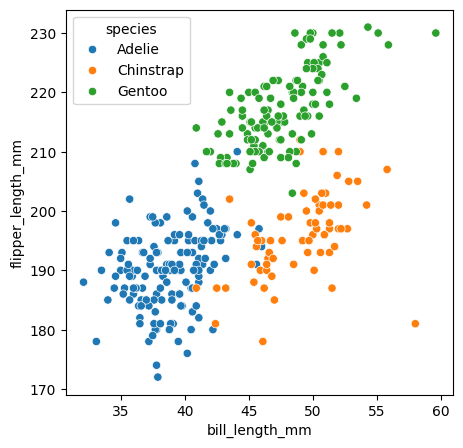

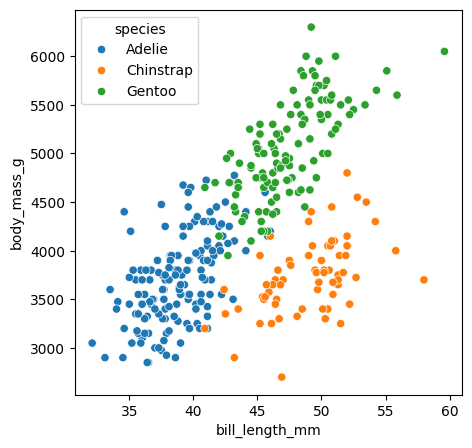

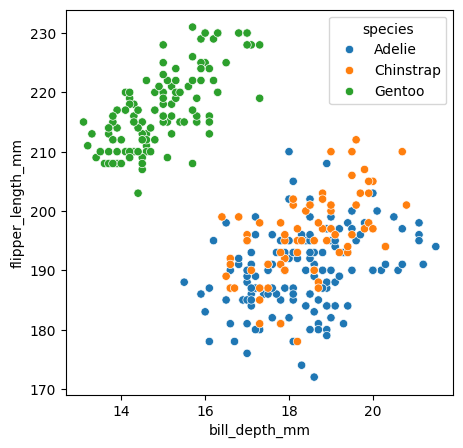

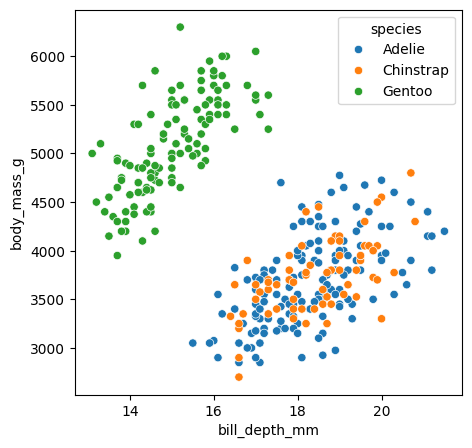

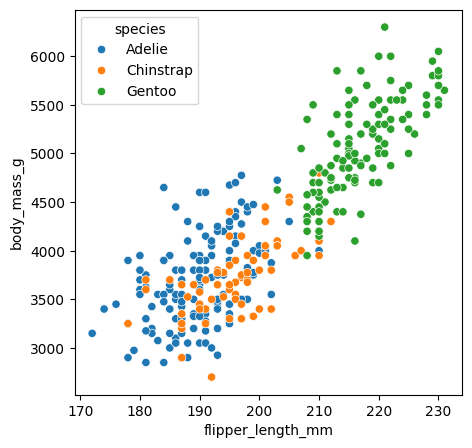

In [76]:
# Scatterplots zijn interessant om te kijken naar de combinatie van meerdere features
# Je kunt horizontale en verticale strepen trekken om grenzen tussen species te bepalen

columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i in range(0, len(columns)-1):
    for j in range (i+1, len(columns)):
        plt.figure(figsize=(5, 5))
        sns.scatterplot(data=df, x=columns[i], y=columns[j], hue='species')
        plt.show()

## Decision trees of beslisbomen

Een duidelijke, navolgbare manier om tot een keuze voor de pinguinsoort te komen, is door een beslisboom (of *decison tree*) te maken. Waarschijnlijk ken je de beslisboom nog wel uit de coronatijd, toen werd die veel gebruikt om te bepalen of je wel of niet de deur uit mocht. Je moest steeds een vraag beantwoorden, die weer leidde toe een nieuwe vraag en uiteindelijk tot het antwoord 'ja, je mag de deur uit' of 'nee, je moet thuisblijven'. 

Ook bij het bepalen van de pinguinsoort kun je een beslisboom maken. Hieronder een voorbeeld van een beslisboom om verschillende dieren te classificeren.  


bron: https://towardsai.net/p/programming/decision-trees-explained-with-a-practical-example-fe47872d3b53

![beslisboom](./../afbeeldingen/MachineLearning/simpele_beslisboom.png "Simpele beslisboom")

De rechthoeken in deze boom noemen we de *nodes* (of *knooppunten*) en de pijlen zijn de *branches* (of *takken*). De eerste node heet de root node. Daar gaat de hele dataset doorheen en deze wordt opgesplitst in een subset waarbij de dieren veren hebben, en een subset waarbij dat niet zo is. Via de branches komt de data in een nieuwe node terecht. Wordt hier weer een beslissing gemaakt, dan heet dit een *internal node* of *decision node*. Iedere decision node heeft een *splitting criterion*, zoals 'can fly?', om de subset van data die daar aankomt verder te verdelen over de volgende branches. De nodes onder aan de boom heten de *leaf nodes* en hier vind je de categorie die bij een datapunt hoort. In dit voorbeeld dus *Hawk*, *Penguin*, *Dolphin* of *Bear*.


### ML Opdracht 1.2
Maak samen met een medestudent op papier een beslisboom om de pinguinsoort te bepalen op basis van de bekende features. In het voorbeeld hierboven worden alleen categorische variabelen meegenomen, maar voor de pinguins zul je ook gebruik moeten maken van de numerieke variabelen en kun je vragen opstellen als: 'is de flipperlengte groter dan ... mm? Je beslisboom hoeft niet correct te zijn, maar probeer een serieuze poging te doen. 

Gebruik je beslisboom om de soort te bepalen bij de metingen van de stagiair. Is dit hetzelfde als waar je in opdracht 1.1 op uit kwam?

### Supervised learning
Wat je nu gedaan hebt, is een vorm van supervised learning. Je had data waarvan je het *label* wist (in dit geval de pinguin soort), en op basis daarvan maak je een *model* (in dit geval de beslisboom), die je kan helpen om bij nieuwe data zonder label, dit label te bepalen. Dit *label* noemen we ook wel de *target* variabele.

In dit voorbeeld gebruikten we dit om het werk van een fictieve klunzige stagiair te fixen, maar in de praktijk wordt dit vaak gebruikt om voorspellingen te doen. Denk bijvoorbeeld aan:
- Fraude detectie: Kun je creditcard transacties als 'frauduleus' of 'niet frauduleus' bestempelen, op basis van transactiekenmerken zoals bedrag, locatie, tijdstip en gebruikersgeschiedenis. Hierbij kun je een model trainen op basis van transacties waarvan je weet dat ze frauduleus waren. Dit model kan je dan gebruiken om transacties af te keuren, of om bij de creditcardeigenaar na te vragen of het wel een valide transactie was. 

- Klantbehoud (*churn* voorspelling): Kun je bestaande klanten classificeren als 'waarschijnlijk vertrekkend' (churn) of 'waarschijnlijk blijvend', op basis van klantkenmerken zoals abonnementsduur, type contract, maandelijkse kosten, dataverbruik, aantal klantenservice interacties en demografische gegevens? Hierbij kun je een model trainen op basis van historische klantdata waarvan je weet wie er in het verleden is vertrokken en wie niet. Dit model kun je dan gebruiken om voor huidige klanten te voorspellen wie een hoog risico loopt om te vertrekken, zodat je deze klanten een aanbieding kunt geven om te blijven.

- Medische diagnose: Kun je op basis van patientgegevens en testresultaten voorspellen of er vervolgonderzoek nodig is naar een bepaalde ziekte? Als je historische gegevens hebt met testresultaten en een uiteindelijke diagnose, kun je mogelijk voorspellen bij welke testresultaten er geen vervolgonderzoek meer nodig is. Dit kan veel kosten en ongemak schelen bij de patient.


### Machine learning
Jullie hebben het *model* voor de classificatie van pinguins net zelf gemaakt door goed naar de beschikbare data te kijken. In dit geval lukt dat aardig, maar zodra patronen in data complexer worden, zijn mensen daar niet zo goed in. Dit is precies waar *machine learning* komt kijken. Hierbij ga je niet meer zelf op zoek naar de verbanden in de data, maar besteed je dat uit aan een machine learning model. Wij gaan gebruik maken van python code, en met name van de librarie scikit-learn, om deze modellen te maken.

## Scikit learn

Scikit-learn is een python library die allerlei functionaliteit bevat voor het trainen van machine learning modellen, datapreparatie stappen en evaluatietechnieken die daarbij horen. Zie: https://scikit-learn.org/stable/

Laten we nu scikit-learn gebruiken om een beslisboom voor de pinguinsoorten te maken. Hier vind je de documentatie van de *decision tree classifier* van scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier In de volgende cellen demonstereren we het gebruik hiervan.


Omdat sklearn een erg grote library is, is het gebruikelijk om niet de hele library te importeren, maar alleen de onderdelen die je nodig hebt. In ons geval is dat nu alleen de DecisionTreeClassifier.

In [77]:
from sklearn.tree import DecisionTreeClassifier

Eerst maken we een decison tree object aan:

In [78]:
dtc = DecisionTreeClassifier()

Om dit object een beslisboom op onze data te maken moeten we deze trainen op de dataset waar de labels bekend zijn. Deze dataset splitsen we op in een dataset met alle *feature variabelen* (de variabelen die we gebruiken om de voorspelling te maken) en een dataset met de *target variabele*, dit is de variabele die we willen gaan voorspellen. In ons geval dus de pinguinsoort.

In [79]:
#Lees de pinguin dataset in
pinguin_df = pd.read_csv('../databronnen/pinguins.csv')

#Noem de dataset met features X - we gebruiken nu alleen de numerieke variabelen als features
X = pinguin_df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
#Noem de dataset met labels y
y = pinguin_df['species']

Vervolgens gaan we deze datasets gebruiken om het decision tree object te *trainen*. Tijdens het trainen worden de patronen in de data geleerd. In het geval van een decision tree wordt dus bepaalt op welke features de data gesplit moet worden. Dit trainen doen we door de `.fit` methode aan te roepen:

In [80]:
dtc.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Nu bevat het `dtc` object een getraind model. Hieronder wordt de getrainde beslisboom gevisualiseerd:

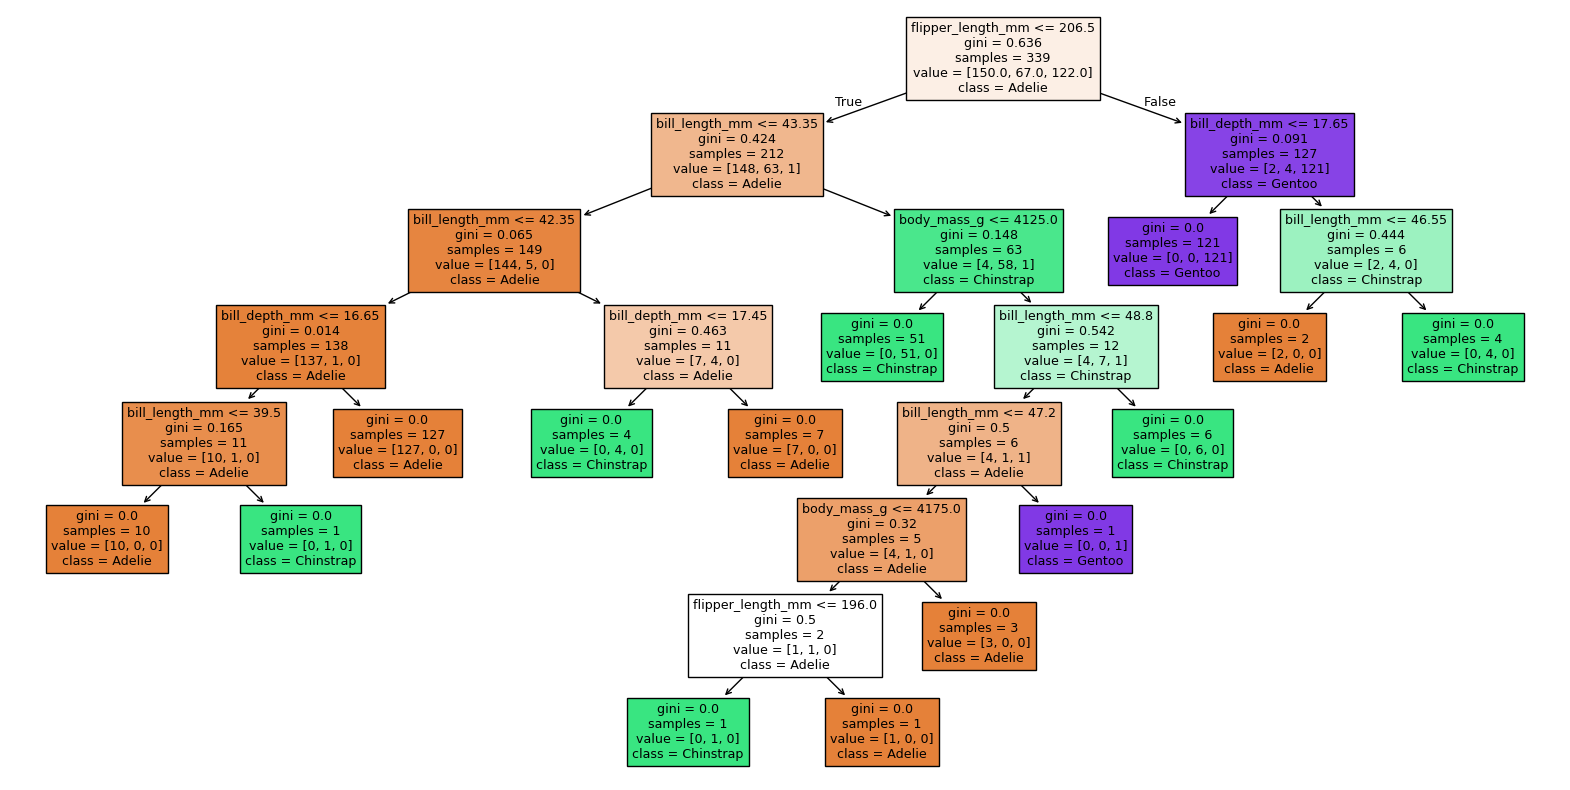

In [81]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=X.columns, class_names=dtc.classes_, filled=True)
plt.show()

In de *root node* en de *decision nodes* zie je in de eerste regel het *splitting criterion*, bijvoorbeeld of de flipper lengte kleiner is dan 206.5 mm. De *branch* naar links hoort altijd bij True, en de branch naar rechts bij *False*. In de *leaf nodes* zie je welke classe erbij voorspeld wordt. Later gaan we dieper in op alle technische details van zo'n beslisboom.

### Inference

Nu we een getrainde beslisboom hebben, kunnen we deze gaan gebruiken om de pinguins waarvan de stagiair de data heeft verzameld te classificeren (oftewel de soort erbij te voorspellen). Dat kun je doen door de boom na te lopen en bij iedere beslissing de juiste tak te kiezen.

### ML Opdracht 1.3
Bepaal handmatig door de splitsingen in de beslisboom te volgen wat de voorspelling is voor de eerste pinguin uit de dataset pinguins_metingen_stagiair.csv.

### Inference met sklearn
Uiteraard is het wat omslachtig om alle voorspellingen handmatig te doen en uiteraard is hier ook een python functie voor. We kunnen op het dtc object de methode `predict` aanroepen, waarbij we de pinguin_stagiair dataset meegeven. Het is hierbij belangrijk dat deze precies dezelfde vorm heeft (dus dezelfde features) als de dataset waarop het model is getraind (in de `fit` aanroep). 

### ML Opdracht 1.4
Maak gebruik van `dtc.predict(...)` om bij de metingen van de stagiair de soort pinguin te voorspellen. Voeg deze voorspellingen als een nieuwe kolom toe aan de dataframe `pinguins_stagiair_df`.

In [82]:
### Uitwerking

# De data van de stagiair inladen
pinguins_stagiair_df = pd.read_csv('../databronnen/pinguins_metingen_stagiair.csv')
# dtc.predict krijgt alleen de 4 kwantitatieve features als input, het resultaat is een lijst met voorspellingen
pinguin_soorten = dtc.predict(pinguins_stagiair_df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
# Deze lijst wordt als nieuwe kolom toegevoegd aan het originele dataframe
pinguins_stagiair_df['species'] = pinguin_soorten
pinguins_stagiair_df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,42.1,19.1,195.0,4000.0,Male,Adelie
1,Biscoe,44.5,14.7,214.0,4850.0,Female,Gentoo
2,Dream,51.3,19.2,193.0,3650.0,Male,Chinstrap
3,Dream,39.7,17.9,193.0,4250.0,Male,Adelie
4,Torgersen,42.8,18.5,195.0,4250.0,Male,Adelie


In [83]:
# Stel dat je voor één pinguin een voorspelling wilt maken, bijvoorbeeld de eerste uit het originele dataframe. 
# dan kan dat op de volgende manier
X_sample_1 = pinguin_df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].iloc[[0]]
dtc.predict(X_sample_1)

array(['Adelie'], dtype=object)

In [84]:
# Met predict_proba zie je hoe zeker de boom van zijn zaak is
dtc.predict_proba(X_sample_1)

array([[1., 0., 0.]])

Oke, nu weten we welke soorten pinguins de stagiair heeft gemeten volgens de beslisboom. Maar hoe goed zijn deze voorspellingen nou? Eigenlijk hebben we er nog geen idee van of deze classificatie ergens op slaat, want we kunnen ze niet controleren.

### Train/test split

Uiteraard is daar een oplossing voor bedacht, en dat is het opsplitsen van de dataset met bekende labels (in dit geval pinguin_df) in een *trainset* en een *testset*. De trainset gebruiken we om het model te maken, vervolgens gebruiken we het model om een voorspelling te maken op de testset. Omdat we daar de labels van kennen, kunnen we inschatten hoe goed de voorspellingen van het model zullen zijn op nieuwe data. In data science-terminologie zeggen we ook wel hoe goed het model *generaliseert*. 

### ML Opdracht 1.5
a. Gebruik de random-functionaliteit van numpy om de dataset pinguin_df op te splitsen in een trainset en een testset. Zorg dat de trainset uit ongeveer 70% van de data bestaat en de testset uit 30%. 

b. Train een nieuwe beslisboom op de trainset. 

c. Gebruik het getrainde model een voorspelling te maken op de testset.

d. Bereken hoeveel procent van de voorspelling goed gegaan is. Als het model sommige pinguins uit de testset verkeerd geclassificeerd heeft, laat dan zien om welke rijen het gaat. Wat was de voorspelling en wat was de daadwerkelijke soort? Bepaal op basis hiervan of je vertrouwen hebt in de voorspellingen van het model op de data van de stagiair.

### Uitwerking

In [85]:
pinguin_df = pd.read_csv('../databronnen/pinguins.csv')

In [86]:
dtc = DecisionTreeClassifier(random_state=42)
#Lees de pinguin dataset in 
train = pinguin_df.sample(frac=0.7, random_state=1)
test = pinguin_df.drop(train.index)
#Noem de dataset met features X - we gebruiken nu alleen de numerieke variabelen als features
X_train = train[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
#Noem de dataset met labels y
y_train = train['species']
dtc.fit(X_train, y_train)
#Noem de dataset met features X - we gebruiken nu alleen de numerieke variabelen als features
X_test = test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
#Noem de dataset met labels y
y_test = test['species']
y_pred = dtc.predict(X_test)

In [87]:
# Alternatieve methode
from sklearn.model_selection import train_test_split
dtc = DecisionTreeClassifier()

# X en y zijn de features en target
X, y = pinguin_df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']], pinguin_df['species']
# train_test_split retourneert 4 datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Het model train je met de train data
dtc.fit(X_train, y_train)
# Een voorspelling maak je op de testdata
y_pred = dtc.predict(X_test)

In [88]:
# Je kunt handmatig de accuracy berekenen
sum(y_pred == y_test) / len(y_test) * 100

96.07843137254902

In [89]:
# Maar ook met de accuracy_score functie
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9607843137254902

In [90]:
# Overigens is het ook interessant om de accuracy score op de traindata te berekenen: die is 100%
y_train_pred = dtc.predict(train[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
accuracy_score(y_train, y_train_pred)

0.3755274261603376

In [91]:
# Met deze code kun je bekijken voor welke pinguins de voorspelling niet juist was
y_test[y_pred != y_test]

334       Gentoo
208    Chinstrap
79        Adelie
18        Adelie
Name: species, dtype: object

De desicion tree heeft 3 Adelie pinguins en 1 Gentoo pinguin foutief geclassificeerd, in alle 4 de gevallen voorspelde het model de soort Chinstrap. Dit is een klein deel van de dataset, namelijk maar 6%, dus we kunnen er vanuit gaan dat hij zeer goed in staat is de soort toe te wijzen. We zeggen dat hij een *accuracy* heeft van 94%, omdat hij 94% van de testset goed voorspeld heeft.

Je zou met data analyse nog kunnen achterhalen of de eigenschappen van mannelijke Adelie pinguins lijken op die van een Chinstrap en of je op basis hiervan iets aan je voorspelling kunt verbeteren. Voor nu laten we dat even zitten. 

Merk op: we hebben hierboven onze eigen code geschreven voor het splitten van de dataset in een train- en een testset en we hebben zelf uitgerekend hoeveel procent van de data het juiste label heeft gekregen. Voor beiden zijn ook sklearn-functies beschikbaar, zie: 

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html.

Kijk zelf in de documentatie hoe je deze functies kunt gebruiken.

### Data preparatie - dummies
Tot nu toe hebben we alleen de numerieke features meegenomen in de voorspelling, maar misschien wordt het model wel veel beter als je ook het geslacht (of het eiland) van de pinguin meeneemt. Daar kun je natuurlijk ook een *splitting criterion* van maken. We bekijken een voorbeeld waarbij we de nominale variabele `island` meenemen in het train-proces. 

Als we deze gewoon toevoegen tijdens het trainen krijgen we helaas een foutmelding:


In [92]:
dtc_met_sex = DecisionTreeClassifier(random_state=42)
X_train = train[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g', 'island']]
y_train = train['species']
dtc_met_sex.fit(X_train, y_train)

ValueError: could not convert string to float: 'Biscoe'

We zien een ValueError en dit komt omdat de decision tree niet met het type 'string' om kan gaan, we zullen dus getallen moeten maken van deze kolom.

Als je een ordinale variable hebt, dus een categorische variabele met een volgordelijkheid, dan is het gebruikelijk om deze om te zetten naar een numerieke variabele waarin de volgordelijkheid bewaard blijft. Bijvoorbeeld: [laag, midden, hoog] -> [1,2,3].

Als er geen volgordelijkheid in zit, dan is het beter om zogenoemde `dummies` te maken. Hiervoor kun je de functie `pd.get_dummies` (zie: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) gebruiken. Dit maakt voor iedere unieke waarde in de kolom een nieuwe kolom aan, met daarin 0 of 1. In ons geval krijgen we dus 3 nieuwe kolommen: `island_Torgerson` en `island_Biscoe` en `island_Dream`. De waarde in deze kolommen is 1 als het eiland van de pinguin overeenkomt met de naam van de kolom, anders is het 0.

Merk op: eigenlijk geven 2 van de 3 kolommen al voldoende informatie. Staat er een 0 bij Torgeson en Biscoe, dan komt de pinguin automatisch van Dream.

### ML Opdracht 1.6

Gebruik de `get_dummies()` functie van pandas om de kolom `island` om te zetten naar dummy variabelen. Doe dit eerst voor de trainset en train je model opnieuw. Om vervolgens te testen hoe goed je model werkt, moet je dezelfde bewerking op de testset uitvoeren. Is je model nu beter dan voorheen? Maak een plot van de beslisboom om te zien hoe de dummies gebruikt worden om de data te splitsen.

In [93]:
#uitwerking
train_with_dummies = pd.get_dummies(train, columns = ['island'])
columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g','island_Biscoe', 'island_Dream']
X_train = train_with_dummies[columns]
y_train = train_with_dummies['species']
dtc_with_dummies = DecisionTreeClassifier(random_state=42)
dtc_with_dummies.fit(X_train, y_train)

test_with_dummies = pd.get_dummies(test, columns = ['island'])
X_test = test_with_dummies[columns]
y_test = test_with_dummies['species']
y_pred = dtc_with_dummies.predict(X_test)
sum(y_pred == y_test) / len(y_test) * 100


97.05882352941177

In [94]:
# In onderstaand dataframe zijn de nieuwe kolommen te vinden
train_with_dummies

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
102,Adelie,37.9,18.6,193.0,2925.0,Female,True,False,False
125,Adelie,41.5,18.3,195.0,4300.0,Male,False,False,True
11,Adelie,37.8,17.3,180.0,3700.0,NaN,False,False,True
248,Gentoo,42.8,14.2,209.0,4700.0,Female,True,False,False
238,Gentoo,45.1,14.5,215.0,5000.0,Female,True,False,False
...,...,...,...,...,...,...,...,...,...
94,Adelie,38.1,18.6,190.0,3700.0,Female,False,True,False
193,Chinstrap,45.5,17.0,196.0,3500.0,Female,False,True,False
140,Adelie,32.1,15.5,188.0,3050.0,Female,False,True,False
160,Chinstrap,46.6,17.8,193.0,3800.0,Female,False,True,False


In [95]:
test['voorspelling'] = y_pred
test[y_pred != y_test]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,voorspelling
129,Adelie,Torgersen,43.1,19.2,197.0,3500.0,Male,Chinstrap
313,Gentoo,Biscoe,48.4,14.4,203.0,4625.0,Female,Adelie
334,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,Adelie


De accuracy is nu 97%. Dit is iets meer dan voorheen, maar wel maar een heel klein beetje. Of deze verbetering echt door de toevoeging van de variabele eiland komt, is niet te zeggen. Het kan in dit geval ook toeval zijn (bijvoorbeeld door de random state die je zet).

### Feature importance
We hebben gezien dat de accuracy een klein beetje toeneemt als we het eiland toevoegen aan de features. Maar hoe belangrijk is die feature nou voor de voorspelling? Dan kunnen we zien met behulp van de feature_importances_ property van de decision tree. Dit geeft een lijst met de relatieve belangrijkheid van iedere feature. Hoe hoger het getal, hoe belangrijker de feature is voor de voorspelling.

In [96]:
dtc_with_dummies.feature_importances_

array([0.38123916, 0.04905469, 0.52333525, 0.03351701, 0.        ,
       0.01285389])

Laten we daar een dataframe van maken met de naam van de feature en de bijbehorende waarde. Deze sorteren we gelijk op de waarde van de feature importance, van hoog naar laag.


In [97]:
feature_importances = pd.DataFrame(dtc_with_dummies.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
flipper_length_mm,0.523335
bill_length_mm,0.381239
bill_depth_mm,0.049055
body_mass_g,0.033517
island_Dream,0.012854
island_Biscoe,0.000000


Welke features zijn belangrijk voor de voorspelling van de pinguin soort en welke zouden we misschien wel weg kunnen laten bij het trainen van het model?

### Supervised learning workflow

In dit voorbeeld hebben we een beslisboom gemaakt, maar er zijn veel meer machine learning modellen die je kunt gebruiken. Zowel in de sklearn library als in andere libraries. We gaan in de komende lessen nog verschillende modellen voorbij zien komen en zelf zul je, zeker in het project, ook nog nieuwe modellen gaan ontdekken. Maar als je een supervised learning probleem hebt, zul je grofweg altijd de stappen uitvoeren die we hierboven hebben gezet. Namelijk:

1. Kies een modeltype (hier was dat een desision tree)
2. Split de data in een trainset en een testset
3. Prepareer de trainset (bijvoorbeeld door dummies te maken)
4. Train het model op de trainset
5. Prepareer de testset (door dezelfde stappen uit te voeren als bij de trainset)
6. Voorspel de labels van de testset
7. Evalueer de voorspellingen van het model
    - Als het model goed genoeg is, gebruik het dan op nieuwe data
    - Als het model niet goed genoeg is, probeer verbeteringen uit te voeren (bijvoorbeeld door een ander model te kiezen, of door meer data te verzamelen of betere features te kiezen)

Later zullen we deze stappen iets uitbreiden en zullen we dieper in gaan op het verbeteren en valideren van het model. Voor nu kun je hiermee vooruit om zelf je eerste ML-modellen te gaan trainen!

### Classificatie versus regressie
Hier hebben we een machine learning model getraint om een categorische variabele te voorspellen. Dat noemen we een *classificatie model*. Later gaan we modellen bekijken waarmee je een continue variabele kunt voorspellen. Dat heet een *regressie model*.

### ML Opdracht 1.7
Bekijk het volgende notebook: www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

Hierin worden gegevens van opvarenden van de Titanic in kaart gebracht en wordt getracht een model te maken om te voorspellen of iemand de ramp heeft overleefd of niet. Deze dataset is een veel gebruikte dataset om te oefenen met machine learning.

Bekijk het notebook en beantwoord de volgende vragen:

1. Over 3. Data analysis
- Bekijk de kolommen leeftijd (Age) en cabinegegevens (Cabin). Wat is het meetniveau van beide kolommen?
- De centrum- en spreidingsmaten worden getoond, wat is de gemiddelde leeftijd en wat is de standaarddeviatie?

2. Over 4. Data visualisation
- Onder In [7] wordt een visualisatie getoond. Welke informatie kun je halen uit deze visualisatie?
- Stel dat je een model wilt maken dat kan voorspellen of iemand de ramp heeft overleefd op basis van persoonlijke eigenschappen. Hoe zou je een (simpel) model kunnen maken dat op basis van deze informatie goed (beter dan 70%) scoort?

3. Over 4. Data visualisation
- Onder In [8] wordt nog een visualisatie getoond. Welke informatie kun je halen uit deze visualisatie?
- Hoe zou je een (simpel) model kunnen maken dat op basis van deze informatie? En scoort dit model beter dan bij vraag 2?

4. Over 5. Cleaning Data
- Voor de leeftijd heeft de auteur een AgeGroup gemaakt. Wat is de reden hiervoor? Wat betekent dit voor de meetniveau's / meetwaarden?
- Hoe is de auteur omgegaan met passagiers waarvoor de leeftijd niet bekend was?
- Hoe is de auteur omgegaan met passagiers waarvoor de cabinegegevens niet bekend waren? 

5. Over 6. Choosing the best model
- Wat zijn de gebruikte features en wat is de target variabele? Wat kun je zeggen over de meetniveau's van (al) deze variabelen?
- Een van de gebruikte modellen is een Decision Tree. De visualisatie van zo'n Decision Tree ziet er als volgt uit: https://tfbarker.files.wordpress.com/2013/12/tree.png
- Probeer te snappen hoe deze beslisboom werkt. Wat is de voorspelling van een jongen, jonger dan 12 jaar oud die in de 2e klasse reisde?
- Wat zegt de score van het beste model?


### ML Opdracht 1.8
Sluit nu het kaggle notebook. Lees de dataset zelf in en maak zelf een beslisboom om de overlevingskans van de passagiers te voorspellen. Gebruik de features die je zelf wilt (begin met enkele simpele features) en probeer het model zo goed mogelijk te maken. Zorg dat je een testset apart houdt om de accuracy van je model te bepalen.